<a href="https://colab.research.google.com/github/subhajit-lang/subhajit-coding-station/blob/main/diabrtrs%20predictio%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Ou

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


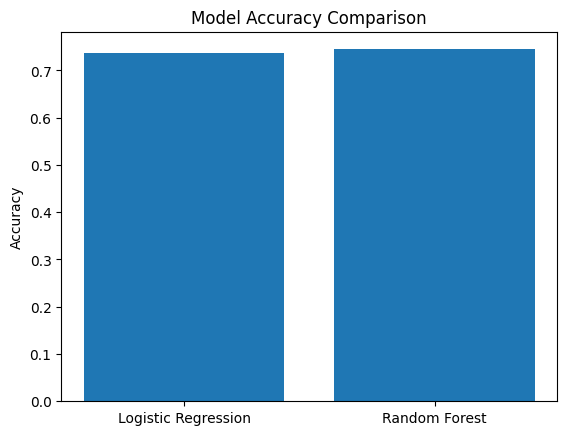

In [11]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
# Assuming the dataset file is 'diabetes.csv' (change the path if necessary)
data = pd.read_csv('diabetes.csv')

# Check the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Step 2: Data Preprocessing
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Check basic statistics of the dataset
print("\nBasic Statistics of the Dataset:")
print(data.describe())

# Check the distribution of the target variable (Outcome)
print("\nTarget Variable Distribution:")
print(data['Outcome'].value_counts())

# Step 3: Split the data into features (X) and target (y)
X = data.drop('Outcome', axis=1)  # Features (all columns except 'Outcome')
y = data['Outcome']  # Target variable (Outcome)

# Normalize the features using StandardScaler (important for many ML models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 5: Model Selection and Training
# Using Logistic Regression and Random Forest for training
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

# Training and Evaluating the Models
best_model = None
best_accuracy = 0

for name, model in models.items():
    print(f"\nTraining {name} model...")
    model.fit(X_train, y_train)  # Train the model

    # Step 6: Evaluate the Model
    y_pred = model.predict(X_test)  # Make predictions

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of {name}: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Store the best model based on accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Step 7: Save the best model (Optional)
import joblib
joblib.dump(best_model, 'best_diabetes_model.pkl')

# Step 8: Predict with the Best Model
# Example: Predict diabetes outcome for a new set of values (input data)
new_data = np.array([6, 148, 72, 35, 0, 33.6, 0.627, 50]).reshape(1, -1)  # Sample input
new_data_scaled = scaler.transform(new_data)  # Scale input data

# Using the best model to make a prediction
prediction = best_model.predict(new_data_scaled)

if prediction[0] == 0:
    print("\nThe patient is not likely to have diabetes.")
else:
    print("\nThe patient is likely to have diabetes.")

# Optional: Plotting the accuracy of all models
model_names = list(models.keys())
accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in models.values()]

plt.bar(model_names, accuracies)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()
